<a href="https://colab.research.google.com/github/ConstantinCed/github1s/blob/master/Assignement_1_121c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**4.1 DE**

Dense Matrix

Hamiltonian computation

In [39]:
import numpy as np
from scipy.sparse import csr_matrix
import scipy
import scipy.sparse.linalg as sla
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import eigh
def ising_hamiltonian(L,h,periodic):
  H=np.zeros((2**L,2**L))
  for b in range(2**L):
    for j in range(1,L+1):
      a=b^(1<<j-1)
      H[a,b]=-h
  for a in range(2**L):
    for j in range(1,L):
      if a&(1<<j)==(a&(1<<j-1))*2:
        H[a,a]-=1
      else:
        H[a,a]+=1

    if periodic:
        if (a & (1 << L-1)) == ((a & (1 << 0))*(2**(L-1))) :
          H[a, a]-=1
        else:
          H[a, a]+=1
  return H

Comparison between periodic and non periodic

In [40]:
L_values=[8,10,12,14]
def calculate_h_values(L):

    if L==8:
        return 50
    if L==10:
        return 30
    if L==12:
        return 30
    if L==14:
        return 12
    else:
        return 30
all_energies = {L: {'periodic': [], 'non_periodic': [], 'h_values': None} for L in L_values}

for periodic in [True, False]:
    for L in L_values:
        h_values = np.linspace(-2, 2, calculate_h_values(L))
        energies = []
        for h in tqdm(h_values, desc=f'Calculating for L={L}, Periodic={periodic}'):
            H = ising_hamiltonian(L, h, periodic)
            ground_state = scipy.linalg.eigh(H, subset_by_index=(0, 0), eigvals_only=True)
            energies.append(ground_state[0])
        all_energies[L]['h_values'] = h_values
        if periodic:
            all_energies[L]['periodic'] = energies
        else:
            all_energies[L]['non_periodic'] = energies

plt.figure(figsize=(14, 7))
for L, data in all_energies.items():
    plt.plot(data['h_values'], data['periodic'], label=f'L={L}, Periodic')
    plt.plot(data['h_values'], data['non_periodic'], linestyle='--', label=f'L={L}, Non-Periodic')

plt.xlabel('h values')
plt.ylabel('Ground state energies')
plt.title('Comparison of Ground State Energies')
plt.legend()
plt.show()


Calculating for L=10, Periodic=True:  23%|██▎       | 7/30 [00:03<00:10,  2.22it/s]


KeyboardInterrupt: 

**4.2 Sparse matrix computation**

In [2]:
from scipy.sparse import csr_matrix
def ising_sparse(L,h,periodic):
  rows = []
  cols = []
  matrix_elements = []
  for b in range(2**L):
    for j in range(1, L + 1):
      a = b ^ (1 << (j - 1))
      rows.append(a)
      cols.append(b)
      matrix_elements.append(-h)

  for a in range(2**L):
    diagonal_value =0
    for j in range(1, L):
        if a & (1 << j) == (a & (1 << (j - 1))) * 2:
            diagonal_value -= 1
        else:
            diagonal_value += 1

    if periodic:
        if (a & (1 << (L - 1))) == ((a & 1) * (2 ** (L - 1))):
            diagonal_value -= 1
        else:
            diagonal_value += 1
        rows.append(a)
        cols.append(a)
        matrix_elements.append(diagonal_value)
  H_sparse = csr_matrix((matrix_elements, (rows, cols)), shape=(2**L, 2**L), dtype=np.float64)
  return H_sparse


Plotting ground state energies for range of h

Computing for L=12: 100%|██████████| 50/50 [00:06<00:00,  8.15it/s]


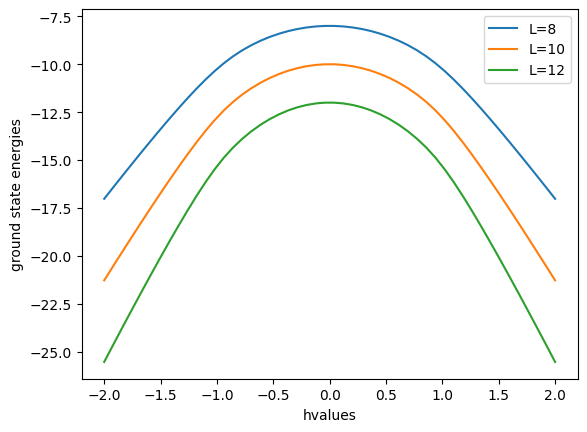

In [4]:

import matplotlib.pyplot as plt
import scipy

L_values = [8,10,12]
h_values = np.linspace(-2, 2)
ground_state_energies = {L: [] for L in L_values}

for L in L_values:
    for h in tqdm(h_values, desc=f'Computing for L={L}'):
        H = ising_sparse(L, h, periodic=True)
        ground_state = scipy.sparse.linalg.eigsh(H, k=1, which='SA', return_eigenvectors=False)[0]
        ground_state_energies[L].append(ground_state)

for L, energies in ground_state_energies.items():
    plt.plot(h_values, energies, label=f'L={L}')
plt.xlabel('hvalues')
plt.ylabel('ground state energies')
plt.legend()
plt.show()

4.3 **Study of L dependence on ground state energy**

Computing for h=1.7, Periodic=False: 100%|██████████| 8/8 [00:00<00:00, 128.40it/s]


{(0.3, True): [-1.044030650891055, -1.0258796278210396, -1.0232403998567148, -1.022757733117059, -1.022658330887903, -1.0226362996458984, -1.0226311671161195, -1.0226299276422322], (0.3, False): [-0.30000000000000004, -0.29999999999999993, -0.3, -0.2999999999999998, -0.29999999999999993, -0.30000000000000016, -0.30000000000000004, -0.2999999999999999], (1.7, True): [-1.972308292331602, -1.8865765724632493, -1.8638830888395086, -1.8560635174425386, -1.8529895340333404, -1.8516816304356278, -1.8510948359359936, -1.850821300966195], (1.7, False): [-1.7000000000000002, -1.7, -1.7000000000000002, -1.6999999999999993, -1.7, -1.7000000000000004, -1.6999999999999997, -1.6999999999999995]}
{(0.3, True): [-1.044030650891055, -1.0258796278210396, -1.0232403998567148, -1.022757733117059, -1.022658330887903, -1.0226362996458984, -1.0226311671161195, -1.0226299276422322], (0.3, False): [-0.30000000000000004, -0.29999999999999993, -0.3, -0.2999999999999998, -0.29999999999999993, -0.30000000000000016,

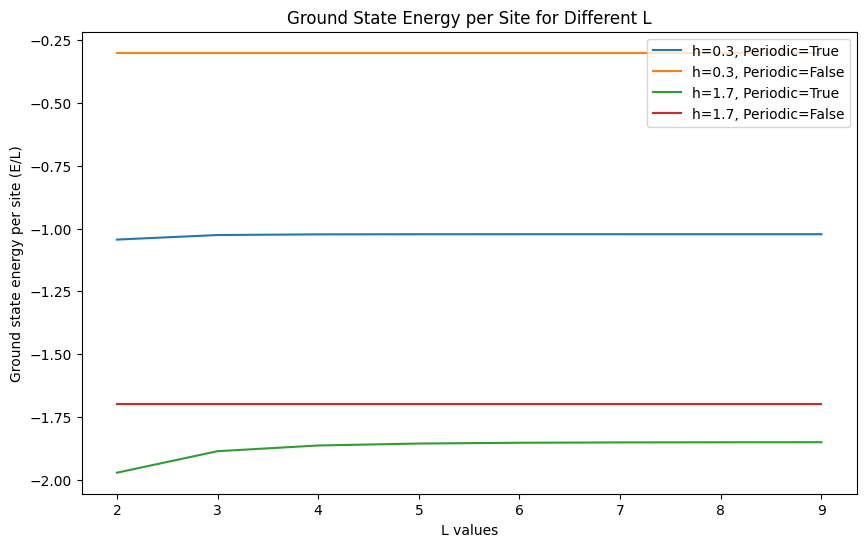

In [3]:
import matplotlib.pyplot as plt
import scipy.sparse.linalg


L_values = range(2, 10)
h_values = [0.3, 1.7]
energy_per_site = {(h, periodic): [] for h in h_values for periodic in [True, False]}

for h in h_values:
    for periodic in [True, False]:
        for L in tqdm(L_values, desc=f'Computing for h={h}, Periodic={periodic}'):
            H = ising_sparse(L, h, periodic)
            ground_state = scipy.sparse.linalg.eigsh(H, k=1, which='SA', return_eigenvectors=False)[0]
            energy_per_site[(h, periodic)].append(ground_state / L)

plt.figure(figsize=(10, 6))
for h in h_values:
    for periodic in [True, False]:
        plt.plot(L_values, energy_per_site[(h, periodic)], label=f'h={h}, Periodic={periodic}')
        print(energy_per_site)
plt.xlabel('L values')
plt.ylabel('Ground state energy per site (E/L)')
plt.title('Ground State Energy per Site for Different L')
plt.legend()
plt.show()


**4.4 plotting excited states and finding nu**

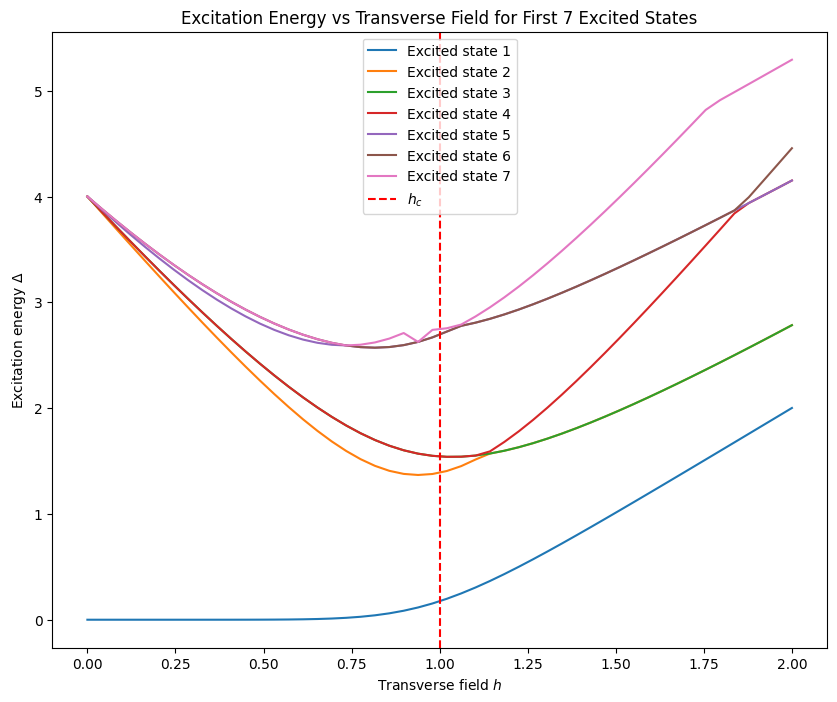

In [9]:
import numpy as np
import scipy.sparse.linalg as sla
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def find_excited_energies(H_sparse):
    eigenvalues = sla.eigsh(H_sparse, k=8, which='SA', return_eigenvectors=False)
    ground_state_energy = np.min(eigenvalues)
    excited_state_energies = np.sort(eigenvalues)[1:]
    return ground_state_energy, excited_state_energies




h_values = np.linspace(0, 2, 50)
ground_state_energies = []
excited_state_energies_list = [[] for _ in range(7)]

for h in h_values:
    H_sparse = ising_sparse(L, h, periodic=True)
    ground_energy, excited_energies = find_excited_energies(H_sparse)
    ground_state_energies.append(ground_energy)
    for i, energy in enumerate(excited_energies):
        excited_state_energies_list[i].append(energy)

ground_state_energies = np.array(ground_state_energies)
excited_state_energies = np.array(excited_state_energies_list)

plt.figure(figsize=(10, 8))
for i in range(7):
    energy_gaps = excited_state_energies[i] - ground_state_energies
    plt.plot(h_values, energy_gaps, label=f'Excited state {i+1}')

plt.axvline(x=1.0, color='r', linestyle='--', label='$h_c$')
plt.xlabel('Transverse field $h$')
plt.ylabel('Excitation energy $\Delta$')
plt.title('Excitation Energy vs Transverse Field for First 7 Excited States')
plt.legend()
plt.show()


In [26]:
def fit_critical_exponent(h_values, energy_gaps, hc):
    fit_func = lambda h, nu: np.abs(h - hc) ** nu
    popt, pcov = curve_fit(fit_func, h_values, energy_gaps)
    return popt[0]
hc=1
energy_gaps_first_excited = excited_state_energies[0] - ground_state_energies

nu_estimate_first_excited = fit_critical_exponent(h_values, energy_gaps_first_excited, hc)

print(f"Estimated critical exponent nu for the first excited state: {nu_estimate_first_excited}")


Estimated critical exponent nu for the first excited state: 0.9158242779320827


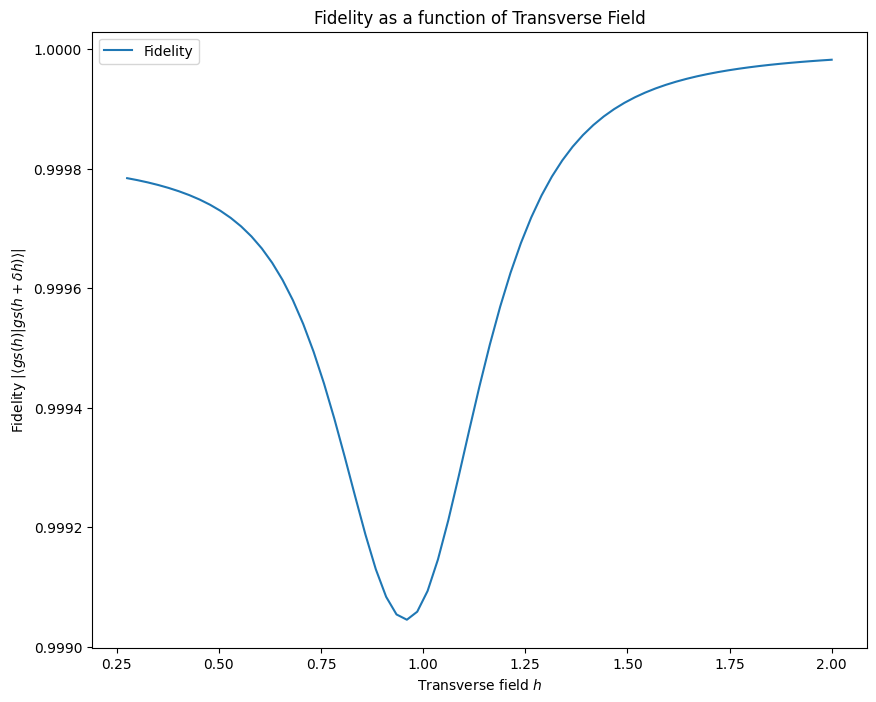

In [50]:
def find_ground_state(H_sparse):
    eigenvalues, eigenvectors = sla.eigsh(H_sparse, k=1, which='SA')
    ground_state_energy = eigenvalues[0]
    ground_state_wavefunction = eigenvectors[:, 0]
    return ground_state_energy, ground_state_wavefunction
h_values = np.linspace(0.25, 2, 70)
fidelities = []
previous_ground_state = None

for h in h_values:
    H_sparse = ising_sparse(L, h, periodic=True)
    ground_energy, ground_state = find_ground_state(H_sparse)

    if previous_ground_state is not None:

        fidelity = np.abs(np.vdot(previous_ground_state, ground_state))
        fidelities.append(fidelity)

    previous_ground_state = ground_state


h_values_for_fidelity = h_values[1:]

plt.figure(figsize=(10, 8))
plt.plot(h_values_for_fidelity, fidelities, label='Fidelity')
plt.xlabel('Transverse field $h$')
plt.ylabel('Fidelity $|\\langle gs(h)|gs(h + \delta h)\\rangle|$')
plt.title('Fidelity as a function of Transverse Field')
plt.legend()
plt.show()



**4.7 Making use of the ising symmetry**